## Interpolation Khaliq Aghakarimov

To interpolate is to recover a smoother signal from a sampling. 

In [0]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt

### The true sound Khaliq Aghakarimov


Here we create a signal which represent a sound recorded with an electric device. With `add_parasite=True`, this sound have some parasite. 

$(1\heartsuit)$ Observe the signal with and without parasite. Where could come such parasite ?  

In [0]:
# a continuous signal which is a sound
def signal(t,add_parasite):
    y= np.sin(4*np.pi*t)+0.5*np.sin(6*np.pi*t)+0.2*np.sin(10*np.pi*t)
    if add_parasite:
        y+=0.1*np.sin(220*2*np.pi*t)
    return y

We make a first smooth sampling which represente precisely the signal.

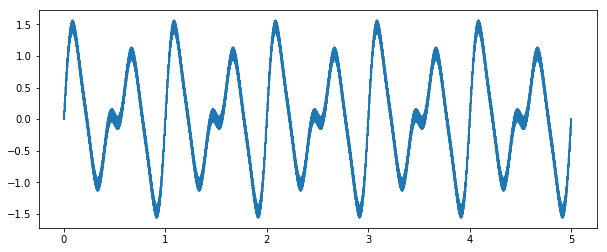

In [0]:
T=5#duration
sampling_rate_smooth=10000

t=np.linspace(0,T,sampling_rate_smooth*T)
signal_smooth=signal(t,add_parasite=True)
fig,ax=plt.subplots(figsize=(10,4))
ax.plot(t,signal_smooth,"-")
np.savetxt("signal_smooth.csv",signal_smooth)

Now, we produce a second sampling, from the first, with a sample rate realy lower. 

Imagine that the first recording was made with a very high quality digital recorder, while the second is the compression of the first one. 

50.0

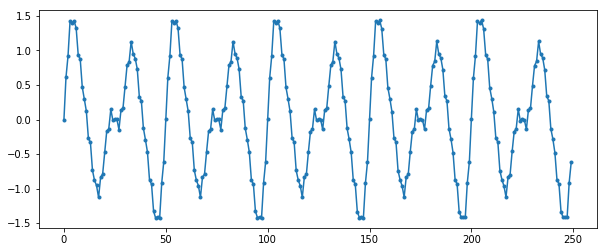

In [0]:
factor=200
sampling_rate_sampled=sampling_rate_smooth/factor

signal_sampled=signal_smooth[::factor]

fig,ax=plt.subplots(figsize=(10,4))
ax.plot(signal_sampled,".-")

sampling_rate_sampled

### Observe the Fourier transforms Khaliq Aghakarimov



Here is the fft of the two signals

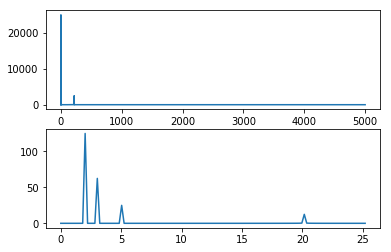

In [0]:
fig,(ax0,ax1)=plt.subplots(2,1)

half_spectrum_smooth=np.fft.rfft(signal_smooth)
half_spectrum_sampled=np.fft.rfft(signal_sampled)


freq_smooth=np.linspace(0,len(half_spectrum_smooth)/T,len(half_spectrum_smooth))
ax0.plot(freq_smooth,np.abs(half_spectrum_smooth));
freq_sampled=np.linspace(0,len(half_spectrum_sampled)/T,len(half_spectrum_sampled))
ax1.plot(freq_sampled,np.abs(half_spectrum_sampled));

In [0]:
diff=len(signal_smooth)-len(signal_sampled)
diff

49750

Let's prolongate the `signal_sample` by zeros. And then we plot the beginning of the two spectrum. 


$(1\heartsuit)$ What to you remark below?

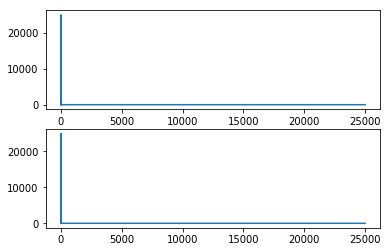

In [0]:
half_spectrum_sampled_prolongated=np.concatenate([half_spectrum_sampled,np.zeros([diff//2])])
half_spectrum_sampled_prolongated*=(len(signal_smooth)/len(signal_sampled))

fig,(ax0,ax1)=plt.subplots(2,1)

nb=len(half_spectrum_sampled_prolongated)//100

ax0.plot(np.abs(half_spectrum_smooth));
ax1.plot(np.abs(half_spectrum_sampled_prolongated));


### reconstitution Khaliq Aghakarimov

Now we can reconstituate a smooth signal, from the prolongated spectrum of the sampled signal. 

In [0]:
signal_re=np.fft.irfft(half_spectrum_sampled_prolongated)
signal_re.shape

(50000,)

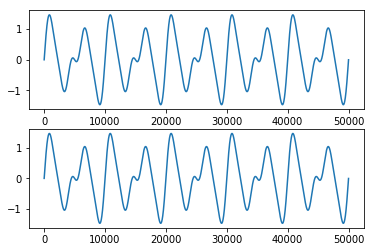

In [0]:
fig,(ax0,ax1)=plt.subplots(2,1)

ax0.plot(signal_smooth);
ax1.plot(signal_re);

### To you Khaliq Aghakarimov


The result is not so nice. Is is due to the parasites. 

$(1\heartsuit)$ Re-run all the previous code, but setting `add_parasite=False`.  Then the interpolation becomes realy better. 



But doing this: you cheating: the original sound can not be modified. The parasite are here because of the electric device, and you cannot change this device. 

$(4\heartsuit)$ Invent a technic to make a nice interpolation, but starting with the `signal_smooth` produce with `add_parasite=True`. Actually, this technic was already invented, it is called "pre-filtering". 


